<a href="https://colab.research.google.com/github/luisflorenz/jupyter_data/blob/main/house_prices_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House-Prices-Market

This is a machine learning progect using regression models techniques .

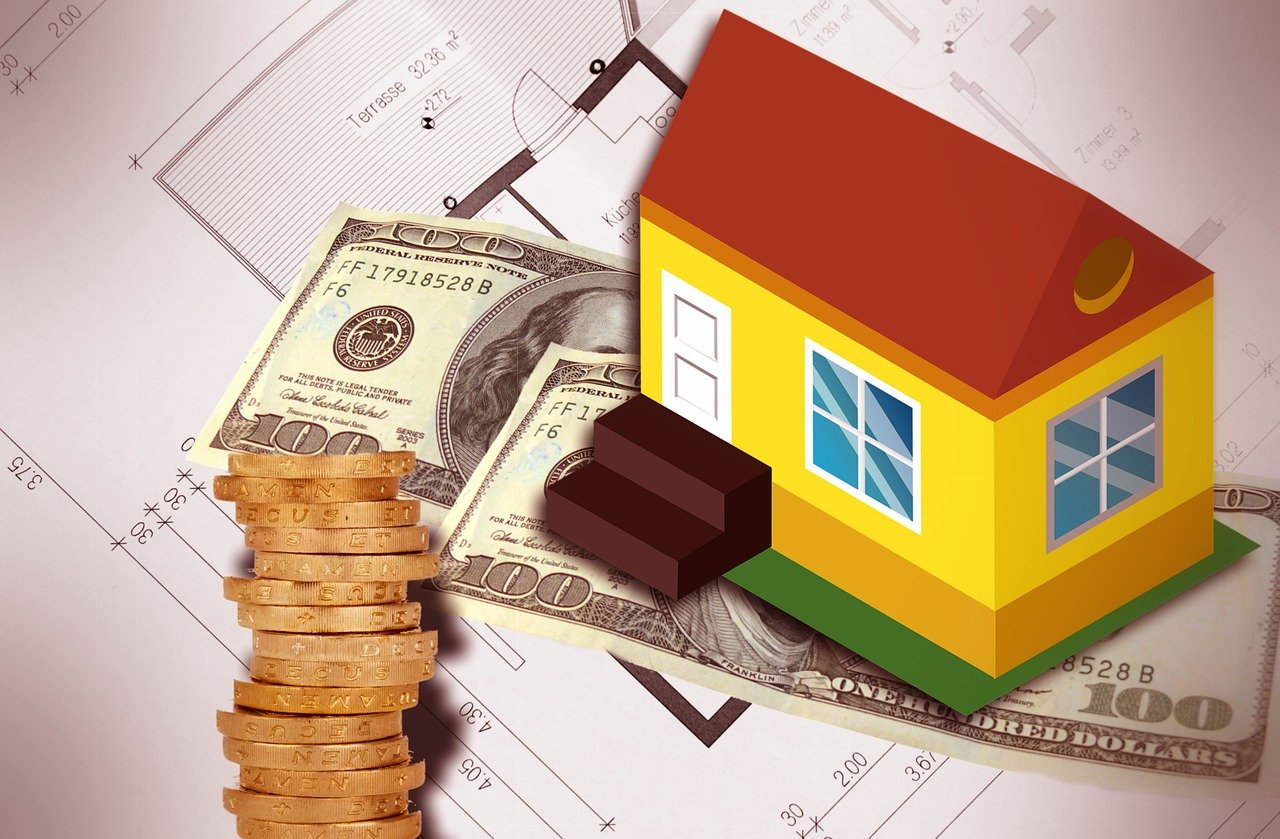

 In this database about the housing market and how price negotiations influence much more than the number of bedrooms or a white picket fence, by using a machine leaning regression model we will seek to predict the price of homes.

### Install Required Libraries

In [ ]:
!pip install pandas-profiling numpy matplotlib seaborn --quiet

In [ ]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


### Download Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import opendatasets as od
import csv
import os

In [ ]:
dataset_url = 'https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview'

In [ ]:
od.download(dataset_url)

100%|██████████| 199k/199k [00:00<00:00, 59.9MB/s]


Extracting archive ./house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip to ./house-prices-advanced-regression-techniques


In [76]:
data_dir = 'house-prices-advanced-regression-techniques'

### View Dataset Files
Let's look at the size, no. of lines and first few lines of each file

In [ ]:
!ls -lh {data_dir}

total 944K
-rw-r--r-- 1 root root  14K Oct 18 12:10 data_description.txt
-rw-r--r-- 1 root root  32K Oct 18 12:10 sample_submission.csv
-rw-r--r-- 1 root root 441K Oct 18 12:10 test.csv
-rw-r--r-- 1 root root 450K Oct 18 12:10 train.csv


In [ ]:
!wc -l {data_dir}/train.csv

1461 house-prices-advanced-regression-techniques/train.csv


In [ ]:
!wc -l {data_dir}/test.csv

1460 house-prices-advanced-regression-techniques/test.csv


In [ ]:
!wc -l {data_dir}/sample_submission.csv

1460 house-prices-advanced-regression-techniques/sample_submission.csv


### Loading Training Set


In [77]:
train_house_price_df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
train_house_price_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Load Test Set

In [78]:
test_house_price_df = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')
test_house_price_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### Explore the Dataset

In [ ]:
train_house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train_house_price_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
test_house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
test_house_price_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


Here we tried to find a duplicated values in train_house_price_df

In [ ]:
def get_unique(name,data_series):
    print("{} has total {} records and {} are unique.".format(name,len(data_series),len(data_series.unique())))

In [ ]:
get_unique('train_house_price_df', train_house_price_df['Id'])

train_house_price_df has total 1460 records and 1460 are unique.


As we can see there are no duplicate values

### Exploratory Data Analysis and Visualization

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
train_house_price_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
features = train_house_price_df.columns.tolist()
features_v = np.random.choice(features, size=20, replace=False).tolist()

<ipython-input-38-eafa1cb8a9c3>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.histplot(train_house_price_df[features_v].mean(axis=1), color='green', bins=110, label='train data')
<ipython-input-38-eafa1cb8a9c3>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.histplot(test_house_price_df[features_v].mean(axis=1), color= 'yellow', alpha=0.4, bins=110, label='test data');


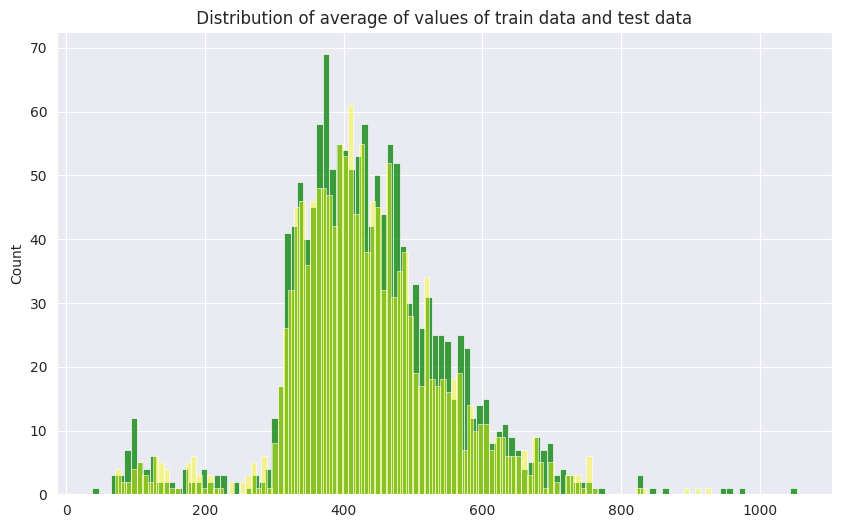

In [ ]:
plt.figure(figsize=(10, 6))
plt.title(' Distribution of average of values of train data and test data ')
sns.histplot(train_house_price_df[features_v].mean(axis=1), color='green', bins=110, label='train data')
sns.histplot(test_house_price_df[features_v].mean(axis=1), color= 'yellow', alpha=0.4, bins=110, label='test data');

<ipython-input-40-0e507095155b>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.histplot(train_house_price_df.mean(axis=0), color='blue', bins=120, kde=True, label='train data')
<ipython-input-40-0e507095155b>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.histplot(test_house_price_df.mean(axis=0), color= 'magenta', kde=True, bins=120, label='test data');


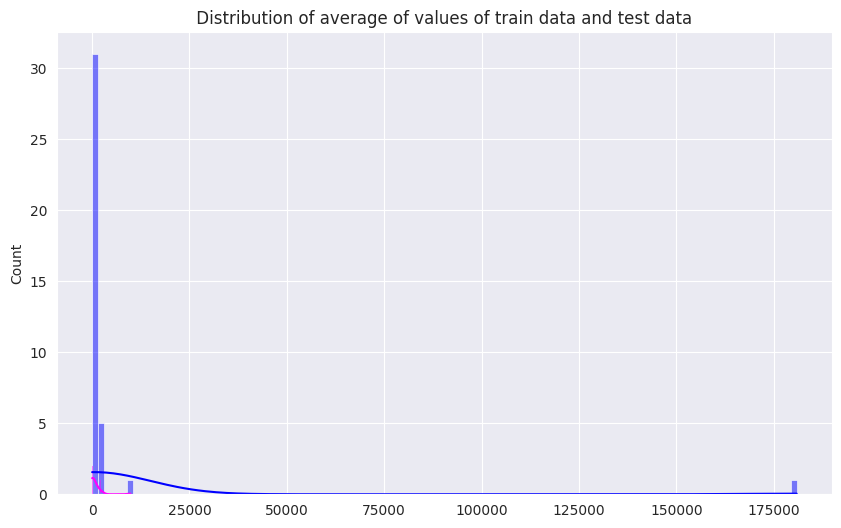

In [ ]:
plt.figure(figsize=(10, 6))
plt.title(' Distribution of average of values of train data and test data ')
sns.histplot(train_house_price_df.mean(axis=0), color='blue', bins=120, kde=True, label='train data')
sns.histplot(test_house_price_df.mean(axis=0), color= 'magenta', kde=True, bins=120, label='test data');

In [ ]:
train_house_price_df.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [ ]:
utilities_count = train_house_price_df.Utilities.value_counts(dropna=False)
utilities_count

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

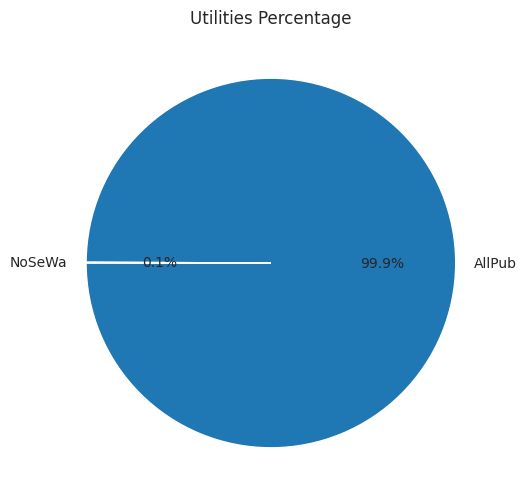

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Utilities Percentage')
plt.pie(utilities_count, labels=utilities_count.index, autopct='%1.1f%%', startangle=180);

In [ ]:
train_house_price_df.corr()

<ipython-input-48-89afb8db9734>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_house_price_df.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<ipython-input-58-bd0ad24b963b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_house_price_df.corr(), annot=True, cmap='Blues');


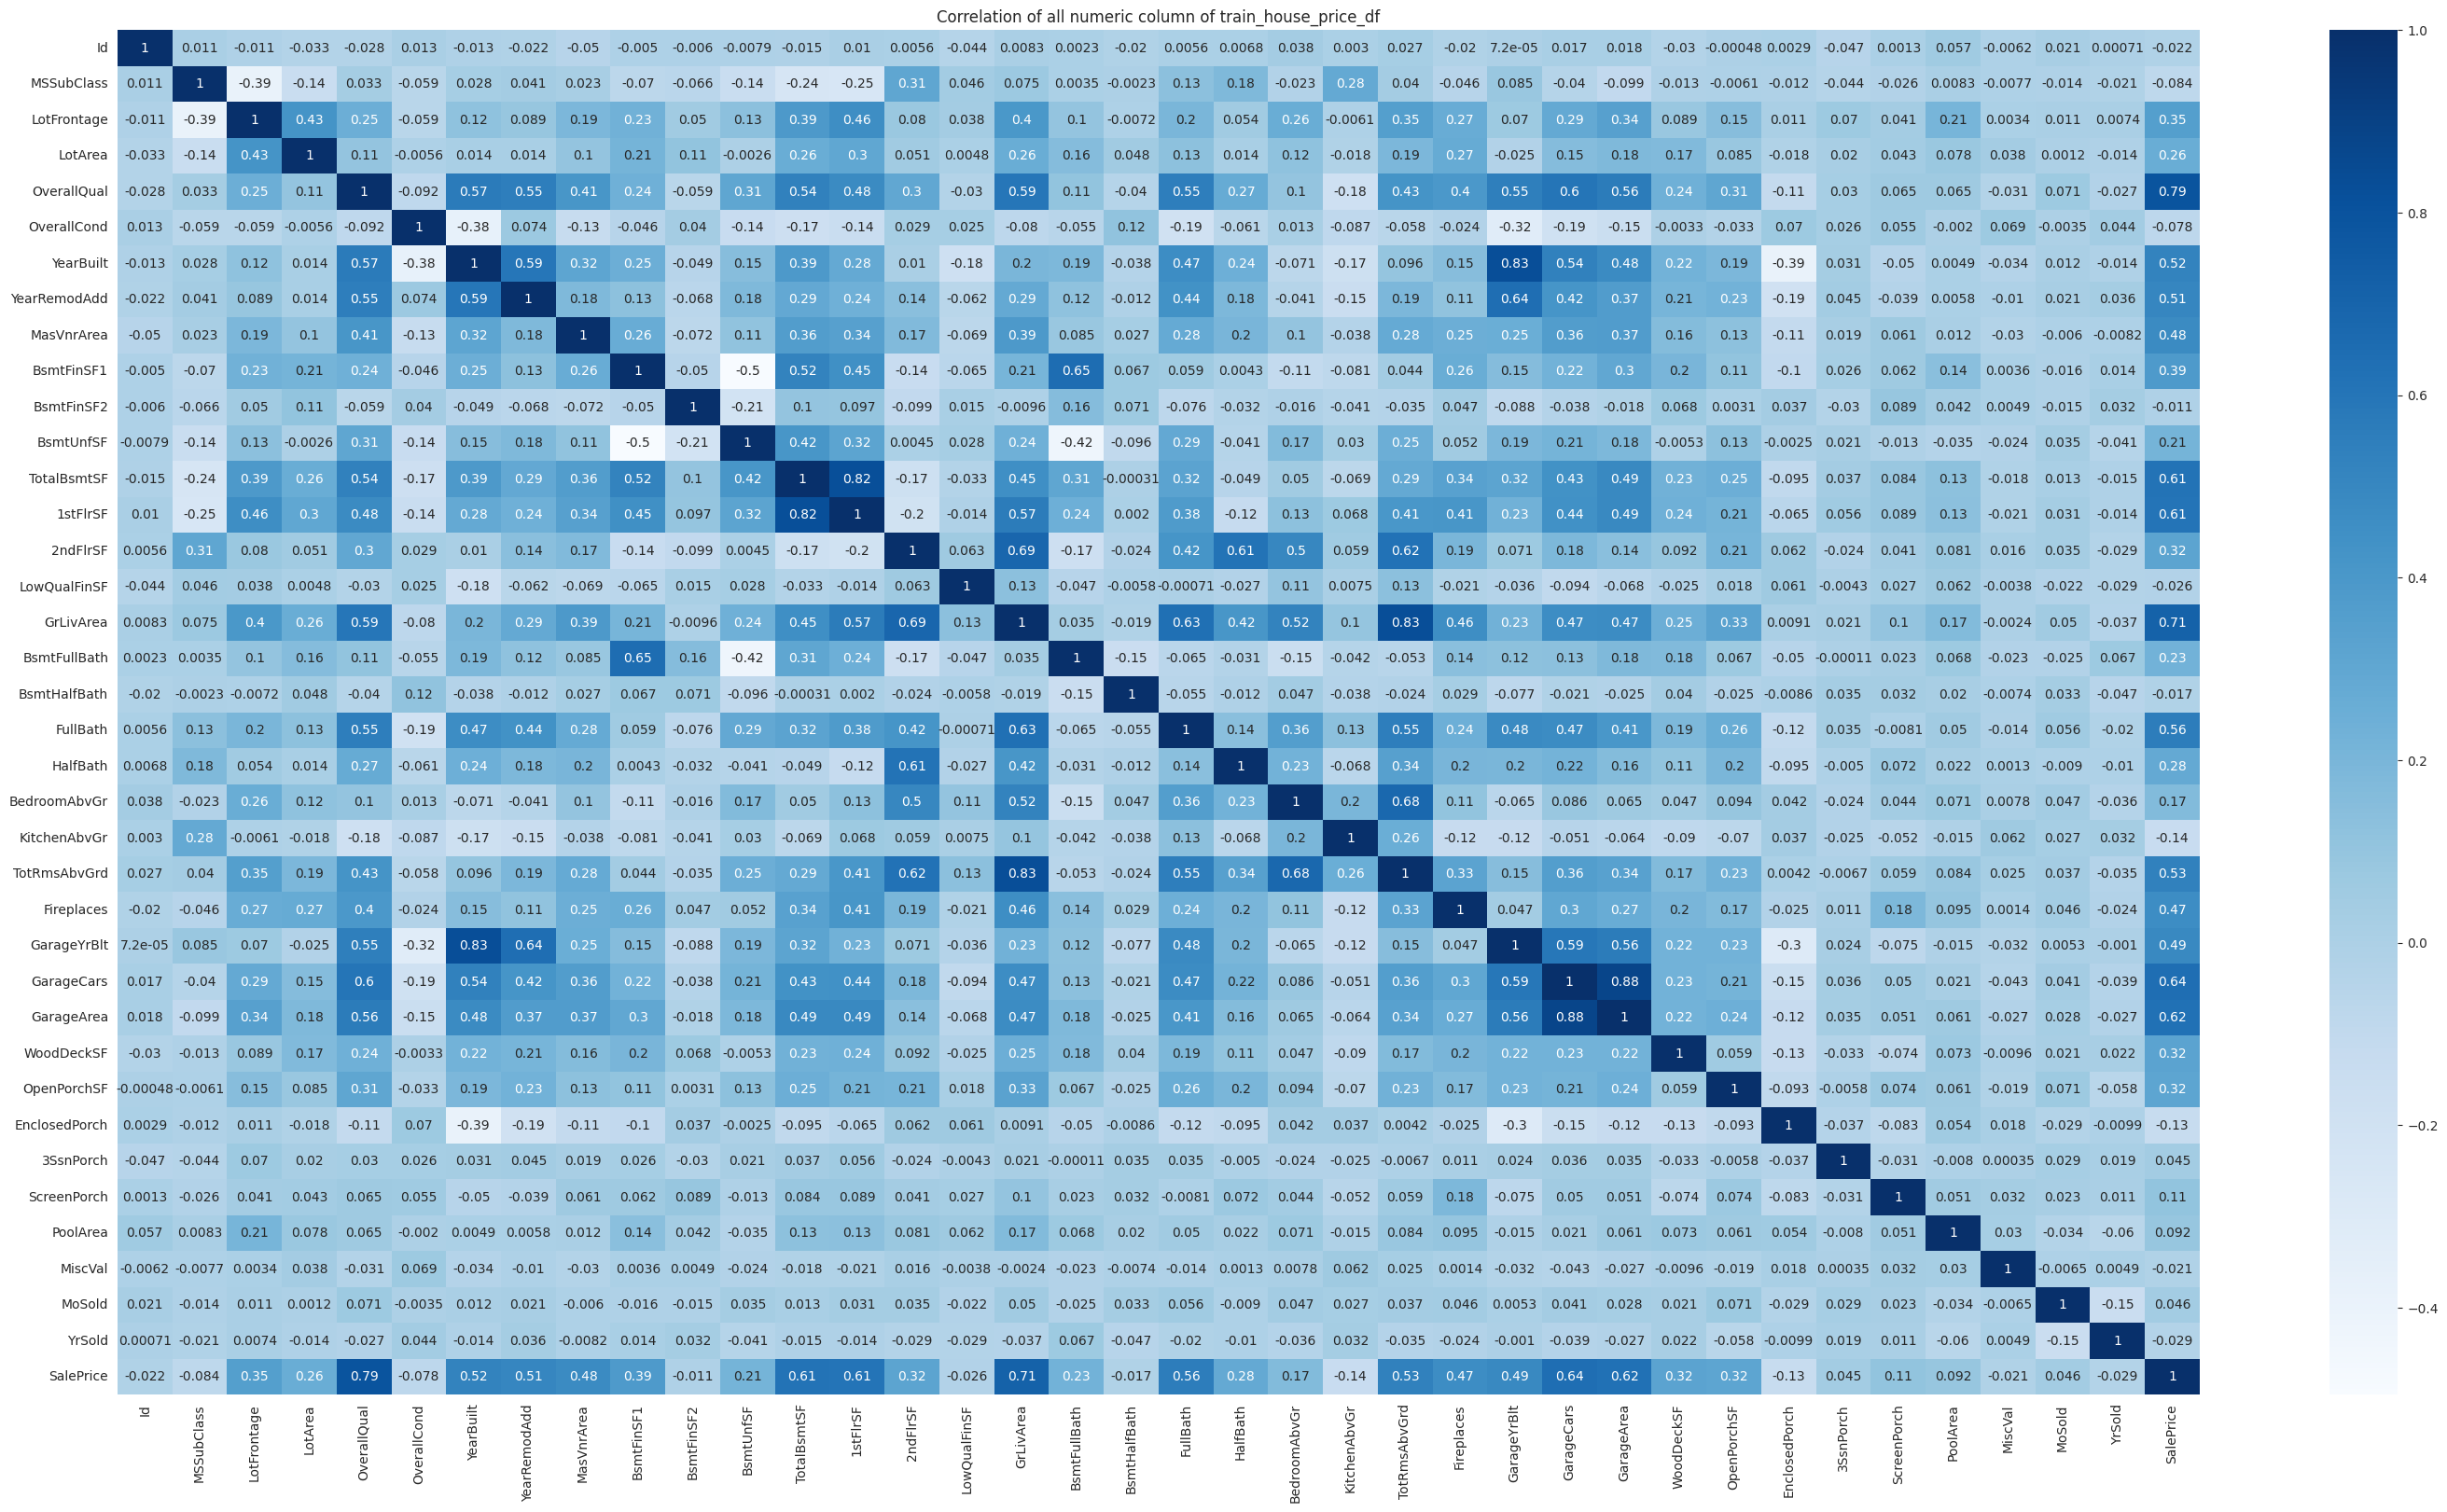

In [ ]:
plt.figure(figsize=(36,19))
plt.title('Correlation of all numeric column of train_house_price_df')
sns.heatmap(train_house_price_df.corr(), annot=True, cmap='Blues');

In [ ]:
test_matrix_corr = train_house_price_df[features_v +['SalePrice']].corr()
test_matrix_corr

<ipython-input-55-f76244305457>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_matrix_corr = train_house_price_df[features_v +['SalePrice']].corr()


,Fireplaces,WoodDeckSF,BsmtHalfBath,OpenPorchSF,2ndFlrSF,FullBath,OverallCond,GrLivArea,GarageArea,GarageYrBlt,SalePrice
Fireplaces,1.000000,0.200019,0.028976,0.169405,0.194561,0.243671,-0.023820,0.461679,0.269141,0.046822,0.466929
WoodDeckSF,0.200019,1.000000,0.040161,0.058661,0.092165,0.187703,-0.003334,0.247433,0.224666,0.224577,0.324413
BsmtHalfBath,0.028976,0.040161,1.000000,-0.025324,-0.023855,-0.054536,0.117821,-0.018918,-0.024536,-0.077464,-0.016844
OpenPorchSF,0.169405,0.058661,-0.025324,1.000000,0.208026,0.259977,-0.032589,0.330224,0.241435,0.228425,0.315856
2ndFlrSF,0.194561,0.092165,-0.023855,0.208026,1.000000,0.421378,0.028942,0.687501,0.138347,0.070832,0.319334
FullBath,0.243671,0.187703,-0.054536,0.259977,0.421378,1.000000,-0.194149,0.630012,0.405656,0.484557,0.560664
OverallCond,-0.023820,-0.003334,0.117821,-0.032589,0.028942,-0.194149,1.000000,-0.079686,-0.151521,-0.324297,-0.077856
GrLivArea,0.461679,0.247433,-0.018918,0.330224,0.687501,0.630012,-0.079686,1.000000,0.468997,0.231197,0.708624
GarageArea,0.269141,0.224666,-0.024536,0.241435,0.138347,0.405656,-0.151521,0.468997,1.000000,0.564567,0.623431
GarageYrBlt,0.046822,0.224577,-0.077464,0.228425,0.070832,0.484557,-0.324297,0.231197,0.564567,1.000000,0.486362


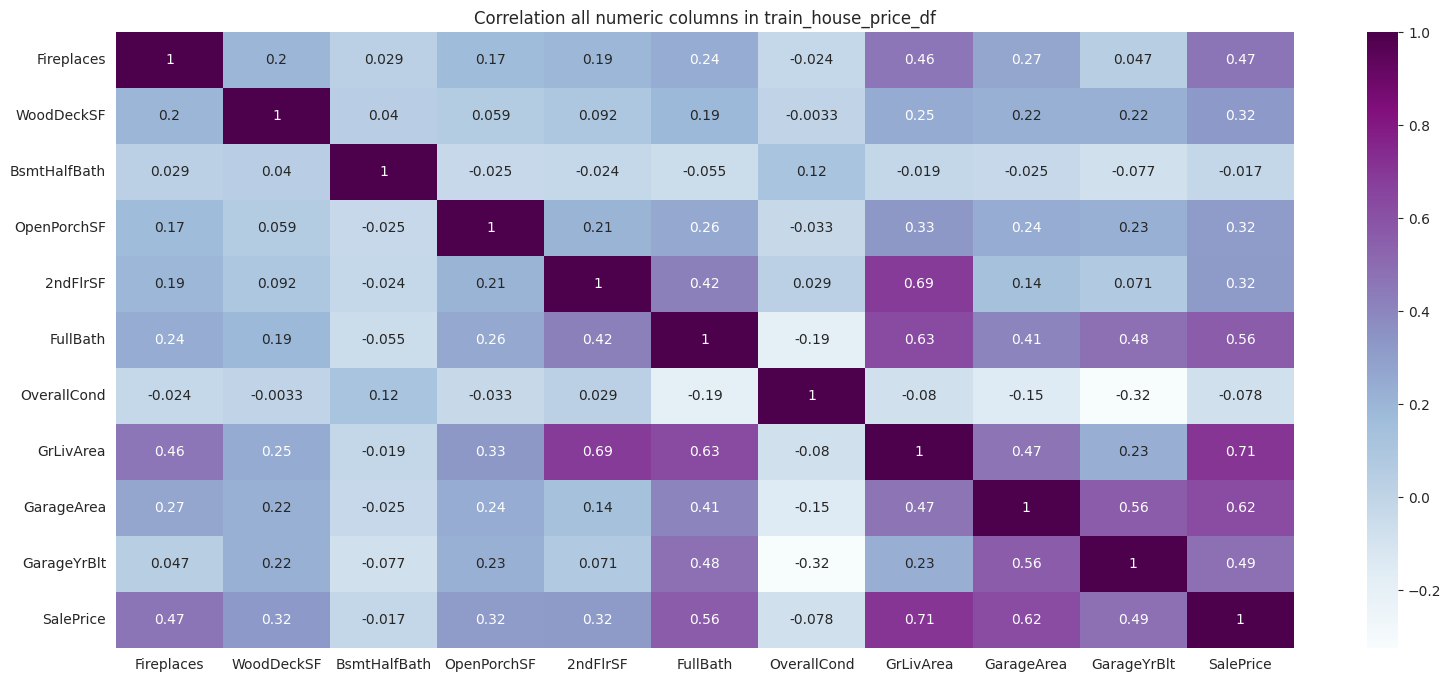

In [ ]:
plt.figure(figsize=(19,8))
plt.title('Correlation all numeric columns in train_house_price_df')
sns.heatmap(test_matrix_corr, annot=True, cmap='BuPu');

Let to make a coy of dataframe to manupulate the values and preparing for traing

In [79]:
train_df = train_house_price_df.copy()
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [80]:
test_df = test_house_price_df.copy()
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### Identify input and target columns

In [91]:
input_cols = train_df.columns[1:-1]
input_cols

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [92]:
target_col = train_df.columns[-1]
target_col

'SalePrice'

In [93]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [94]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[input_cols].copy()


### Identify numeric and categorical columns

In [95]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categotical_cols = train_inputs.select_dtypes(include='object').columns.tolist()


In [96]:
print(numeric_cols)


['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [97]:
print(categotical_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### Imputing missing numeric values

In [98]:
from sklearn.impute import SimpleImputer

In [99]:
inputer = SimpleImputer(strategy= 'mean').fit(train_inputs[numeric_cols])

In [100]:
train_inputs.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [101]:
test_inputs.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [102]:
train_inputs[numeric_cols] = inputer.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = inputer.transform(test_inputs[numeric_cols])

In [103]:
train_inputs[numeric_cols].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [104]:
test_inputs[numeric_cols].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

### Scaling Numeric Features

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaler = MinMaxScaler().fit(train_df[numeric_cols])

In [107]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [108]:
test_inputs.describe().loc[['min', 'max']]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,0.0,0.000000,0.000795,0.0,0.0,0.050725,0.0,0.00000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
max,1.0,0.613014,0.258478,1.0,1.0,1.000000,1.0,0.80625,0.710489,1.035278,...,1.049365,1.66161,1.35649,1.833333,0.708661,1.2,1.084011,1.096774,1.0,1.0


### Encoding Categorical Data

In [109]:
from sklearn.preprocessing import OneHotEncoder

In [110]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_df[categotical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [111]:
encoded_cols = list(encoder.get_feature_names_out(categotical_cols))

In [112]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categotical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categotical_cols])

<ipython-input-112-bf50d48fa05f>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categotical_cols])
<ipython-input-112-bf50d48fa05f>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categotical_cols])
<ipython-input-112-bf50d48fa05f>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

In [113]:
train_inputs

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,RL,0.150685,0.033420,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,RL,0.202055,0.038795,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,RL,0.160959,0.046507,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,RL,0.133562,0.038561,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,RL,0.215753,0.060576,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,RL,0.140411,0.030929,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.000000,RL,0.219178,0.055505,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.294118,RL,0.154110,0.036187,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.000000,RL,0.160959,0.039342,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [114]:
test_inputs

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,RH,0.202055,0.048246,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,RL,0.205479,0.060609,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,RL,0.181507,0.058566,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.235294,RL,0.195205,0.040562,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.588235,RL,0.075342,0.017318,Pave,NaN,IR1,HLS,AllPub,Inside,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,RM,0.000000,0.002973,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,0.823529,RM,0.000000,0.002776,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,0.000000,RL,0.476027,0.087406,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,0.382353,RL,0.140411,0.042726,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


###  Let's Create a training and validation sets

In [115]:
train_inputs = train_inputs[numeric_cols + encoded_cols]
test_inputs = test_inputs[numeric_cols + encoded_cols]

In [ ]:
train_inputs

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
test_inputs

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.202055,0.048246,0.444444,0.625,0.644928,0.183333,0.00000,0.082920,0.097693,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.205479,0.060609,0.555556,0.625,0.623188,0.133333,0.06750,0.163536,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.181507,0.058566,0.444444,0.500,0.905797,0.800000,0.00000,0.140149,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.235294,0.195205,0.040562,0.555556,0.625,0.913043,0.800000,0.01250,0.106662,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.588235,0.075342,0.017318,0.777778,0.500,0.869565,0.700000,0.00000,0.046598,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,0.000000,0.002973,0.333333,0.750,0.710145,0.333333,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,0.823529,0.000000,0.002776,0.333333,0.500,0.710145,0.333333,0.00000,0.044649,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,0.000000,0.476027,0.087406,0.444444,0.750,0.637681,0.766667,0.00000,0.216867,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,0.382353,0.140411,0.042726,0.444444,0.500,0.869565,0.700000,0.00000,0.059709,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Spliting of the data sets and createtraining and validation set
We'll set aside 25% of the training data as the validation set, to evaluate the models we train on previously unseen data.

Since the test set and training set have the same date ranges, we can pick a random 25% fraction.

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
x_train, x_val , train_targets, val_targets = train_test_split(train_inputs, train_targets, test_size=0.25, random_state=42)

In [ ]:
x_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1023,0.588235,0.075342,0.008797,0.666667,0.500,0.963768,0.933333,0.008750,0.002835,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
810,0.000000,0.195205,0.041319,0.555556,0.625,0.739130,0.816667,0.061875,0.117470,0.255767,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1384,0.176471,0.133562,0.036271,0.555556,0.500,0.485507,0.000000,0.000000,0.036145,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
626,0.000000,0.167979,0.051611,0.444444,0.500,0.637681,0.466667,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
813,0.000000,0.184932,0.039496,0.555556,0.625,0.623188,0.133333,0.151875,0.107725,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.000000,0.195205,0.037472,0.555556,0.500,0.971014,0.933333,0.000000,0.004252,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1130,0.176471,0.150685,0.030400,0.333333,0.250,0.405797,0.000000,0.000000,0.110206,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1294,0.000000,0.133562,0.032120,0.444444,0.750,0.601449,0.666667,0.000000,0.029589,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
860,0.176471,0.116438,0.029643,0.666667,0.875,0.333333,0.800000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
train_targets

1023    191000
810     181000
1384    105000
626     139900
813     157900
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1095, dtype: int64

In [ ]:
x_val

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,0.000000,0.167808,0.033252,0.555556,0.875,0.659420,0.883333,0.000000,0.117470,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1105,0.235294,0.263699,0.051209,0.777778,0.500,0.884058,0.750000,0.226250,0.182849,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
413,0.058824,0.119863,0.035804,0.444444,0.625,0.398551,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
522,0.176471,0.099315,0.017294,0.555556,0.750,0.543478,0.000000,0.000000,0.070695,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1036,0.000000,0.232877,0.054210,0.888889,0.500,0.978261,0.966667,0.043750,0.181077,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,0.235294,0.167979,0.050228,0.555556,0.625,0.753623,0.433333,0.186250,0.027640,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
243,0.823529,0.184932,0.044226,0.555556,0.625,0.782609,0.500000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1342,0.235294,0.167979,0.037743,0.777778,0.500,0.942029,0.866667,0.093125,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1057,0.235294,0.167979,0.133955,0.666667,0.625,0.884058,0.733333,0.000000,0.105422,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
val_targets

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
988     195000
243     120000
1342    228500
1057    248000
1418    124000
Name: SalePrice, Length: 365, dtype: int64

## Training Different Model

## Model 01 : DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model01 = DecisionTreeRegressor()
model01.fit(x_train, train_targets)

DecisionTreeRegressor()

finding the feature importance

In [125]:
model01_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model01.feature_importances_
}).sort_values('importance', ascending=False)
model01_importance_df.head(10)

,feature,importance
3,OverallQual,0.632443
15,GrLivArea,0.104497
13,2ndFlrSF,0.030866
11,TotalBsmtSF,0.027617
12,1stFlrSF,0.027005
8,BsmtFinSF1,0.025793
1,LotFrontage,0.017891
26,GarageArea,0.011763
28,OpenPorchSF,0.008144
34,MoSold,0.007780


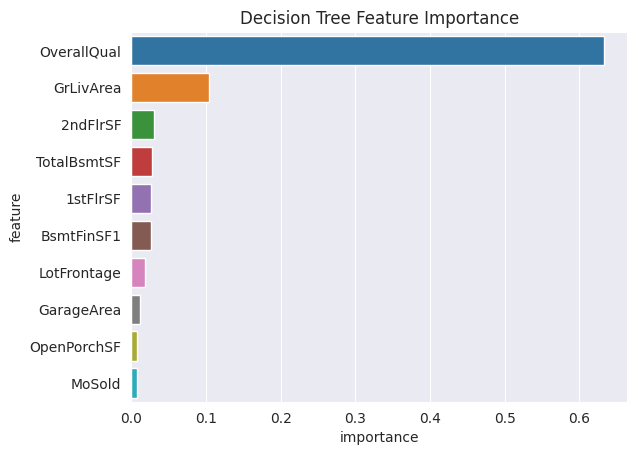

In [ ]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=model01_importance_df.head(10), x='importance', y='feature');

### Make predictions and find the RMSE of the model

In [118]:
from sklearn.metrics import mean_squared_error

In [119]:
model01_train_preds = model01.predict(x_train)

In [120]:
model01_train_rmse = mean_squared_error(train_targets, model01_train_preds, squared=False)

In [121]:
model01_val_preds = model01.predict(x_val)

In [122]:
model01_val_rmse = mean_squared_error(val_targets, model01_val_preds, squared=False)

In [123]:
print('Train RMSE: {}, Validation RMSE: {}'.format(model01_train_rmse, model01_val_rmse))

Train RMSE: 0.0, Validation RMSE: 36068.41303757784


In [124]:
accuracy_train_model01 = model01.score(x_train, train_targets)
accuracy_val_model01 = model01.score(x_val, val_targets)
print(' The accuracy for training set by tree is {:.4f}% and \n for validation set is {:.4f}%'.format(accuracy_train_model01, accuracy_val_model01))

 The accuracy for training set by tree is 1.0000% and 
 for validation set is 0.8143%


Let's try training the model with hiperparameters

In [126]:
def params_test(**params):
    model = DecisionTreeRegressor(random_state=42, **params).fit(x_train, train_targets)
    train_preds, val_preds = model.predict(x_train), model.predict(x_val)
    train_rmse = mean_squared_error(model.predict(x_train), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(x_val), val_targets, squared=False)
    return f"train_mean_error is {train_rmse} and val_mean_error is {val_rmse}"

In [143]:
params_test(max_depth=20)

'train_mean_error is 0.0 and val_mean_error is 37802.872039112044'

In [139]:
params_test(min_samples_leaf=1)

'train_mean_error is 0.0 and val_mean_error is 37802.872039112044'

In [133]:
params_test(min_samples_split=2)

'train_mean_error is 0.0 and val_mean_error is 37802.872039112044'

In [144]:
model01 = DecisionTreeRegressor(min_samples_split=2, max_depth=20, min_samples_leaf=1)
model01.fit(x_train, train_targets)

DecisionTreeRegressor(max_depth=20)

In [145]:
model010_train_preds = model01.predict(x_train)
model010_train_rmse = mean_squared_error(train_targets, model010_train_preds, squared=False)
model010_val_preds = model01.predict(x_val)
model010_val_rmse = mean_squared_error(val_targets, model010_val_preds, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(model010_train_rmse, model010_val_rmse))

Train RMSE: 0.0, Validation RMSE: 36575.97557271563


In [171]:
accuracy_train_model010 = model01.score(x_train, train_targets)
accuracy_val_model010 = model01.score(x_val, val_targets)
print(' The accuracy for training set by tree is {:.4f}% and \n for validation set is {:.4f}%'.format(accuracy_train_model010, accuracy_val_model010))

 The accuracy for training set by tree is 1.0000% and 
 for validation set is 0.8090%


## Model 2 : GradientBoostingRegressor


In [148]:
from sklearn.ensemble import GradientBoostingRegressor

In [149]:
model02 = GradientBoostingRegressor()
model02.fit(x_train, train_targets)

GradientBoostingRegressor()

finding the feature importance

In [155]:
model02_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model02.feature_importances_
}).sort_values('importance', ascending=False)

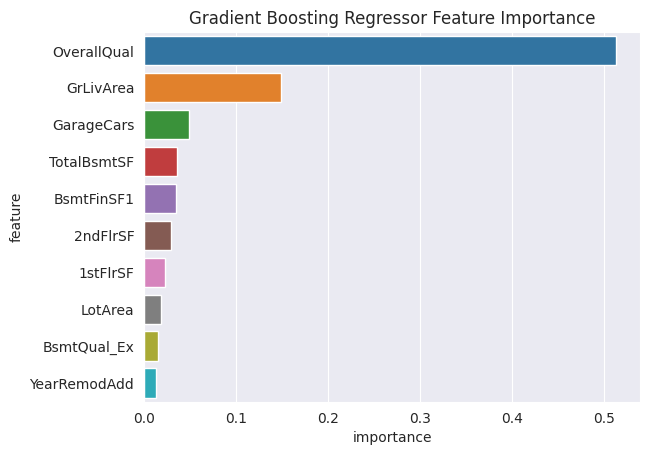

In [156]:
plt.title('Gradient Boosting Regressor Feature Importance')
sns.barplot(data=model02_importance_df.head(10), x='importance', y='feature');

### Make predictions and find the RMSE of the model

In [150]:
model02_train_preds = model02.predict(x_train)

In [151]:
model02_train_rmse = mean_squared_error(train_targets, model02_train_preds, squared=False)

In [152]:
model02_val_preds = model02.predict(x_val)

In [153]:
model02_val_rmse = mean_squared_error(val_targets, model02_val_preds, squared=False)

In [154]:
print('Train RMSE: {}, Validation RMSE: {}'.format(model02_train_rmse, model02_val_rmse))

Train RMSE: 13393.10071630902, Validation RMSE: 25346.69304803183


Let's try training the model with hiperparameters

In [157]:
def params_test(**params):
    model = GradientBoostingRegressor(**params).fit(x_train, train_targets)
    train_preds, val_preds = model.predict(x_train), model.predict(x_val)
    train_rmse = mean_squared_error(model.predict(x_train), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(x_val), val_targets, squared=False)
    return f"train_mean_error is {train_rmse} and val_mean_error is {val_rmse}"

In [158]:
params_test(learning_rate=0.95)

'train_mean_error is 3883.5748019078546 and val_mean_error is 37030.22042917382'

In [165]:
params_test(subsample=1)

'train_mean_error is 13393.10071630902 and val_mean_error is 25922.71727114755'

In [166]:
params_test(min_samples_split=2)

'train_mean_error is 13393.10071630902 and val_mean_error is 25574.343512638254'

In [164]:
params_test(n_estimators=1000)

'train_mean_error is 2432.1700672407333 and val_mean_error is 25191.119941412748'

In [167]:
params_test(random_state=42)

'train_mean_error is 13393.10071630902 and val_mean_error is 26147.213821509817'

In [168]:
moddel02 = GradientBoostingRegressor(learning_rate=0.95, subsample=1, min_samples_split=2, n_estimators=1000, random_state=42)
model02.fit(x_train, train_targets)

GradientBoostingRegressor()

In [172]:
model020_train_preds = model02.predict(x_train)
model020_train_rmse = mean_squared_error(train_targets, model020_train_preds, squared=False)
model020_val_preds = model02.predict(x_val)
model020_val_rmse = mean_squared_error(val_targets, model020_val_preds, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(model020_train_rmse, model020_val_rmse))

Train RMSE: 13393.10071630902, Validation RMSE: 26063.68500054331


In [173]:
accuracy_train_model020 = model02.score(x_train, train_targets)
accuracy_val_model020 = model02.score(x_val, val_targets)
print(' The accuracy for training set by tree is {:.4f}% and \n for validation set is {:.4f}%'.format(accuracy_train_model020, accuracy_val_model020))

 The accuracy for training set by tree is 0.9705% and 
 for validation set is 0.9030%


## Model 3: RandomForestRegressor

In [174]:
from sklearn.ensemble import RandomForestRegressor

In [175]:
model03 = RandomForestRegressor()
model03.fit(x_train, train_targets)

RandomForestRegressor()

finding the feature importance

In [176]:
model03_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model03.feature_importances_
}).sort_values('importance', ascending=False)

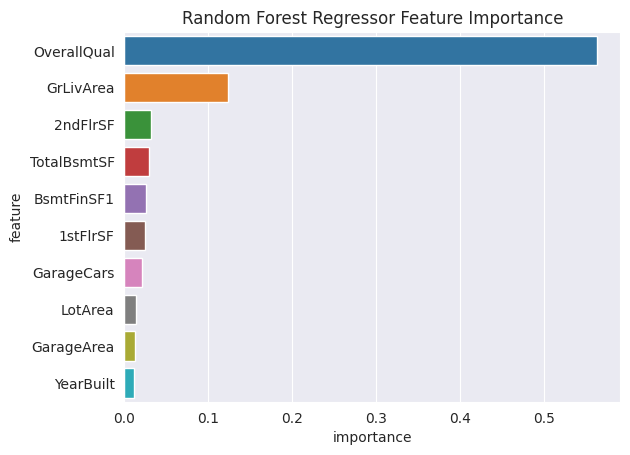

In [177]:
plt.title('Random Forest Regressor Feature Importance')
sns.barplot(data=model03_importance_df.head(10), x='importance', y='feature');

## Make predictions and find the RMSE of the model

In [178]:
model03_train_preds = model03.predict(x_train)

In [179]:
model03_train_rmse = mean_squared_error(train_targets, model03_train_preds, squared=False)

In [180]:
model03_val_preds = model03.predict(x_val)

In [181]:
model03_val_rmse = mean_squared_error(val_targets, model03_val_preds, squared=False)

In [182]:
print('Train RMSE: {}, Validation RMSE: {}'.format(model03_train_rmse, model03_val_rmse))

Train RMSE: 11865.916842869798, Validation RMSE: 27507.735033209745


In [183]:
accuracy_train_model03 = model03.score(x_train, train_targets)
accuracy_val_model03 = model03.score(x_val, val_targets)
print(' The accuracy for training set by tree is {:.4f}% and \n for validation set is {:.4f}%'.format(accuracy_train_model03, accuracy_val_model03))

 The accuracy for training set by tree is 0.9768% and 
 for validation set is 0.8920%


Let's try training the model with hiperparameters

In [215]:
def test_params(**params):
    model = RandomForestRegressor(**params).fit(x_train, train_targets)
    train_rmse = mean_squared_error(model.predict(x_train), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(x_val), val_targets, squared=False)
    return train_rmse, val_rmse

In [216]:
def test_param_and_plot(param_name, param_values):
  train_errors, val_errors = [], []
  for value in param_values:
    params = {param_name: value}
    train_rmse, val_rmse = test_params(**params)
    train_errors.append(train_rmse)
    val_errors.append(val_rmse)
  plt.figure(figsize=(10,6))
  plt.title('Overfitting curve:' + param_name)
  plt.plot(param_values, train_errors, 'b-o')
  plt.plot(param_values, val_errors, 'r-o')
  plt.xlabel(param_name)
  plt.ylabel('RMSE')
  plt.legend(['Training', 'Validation'])

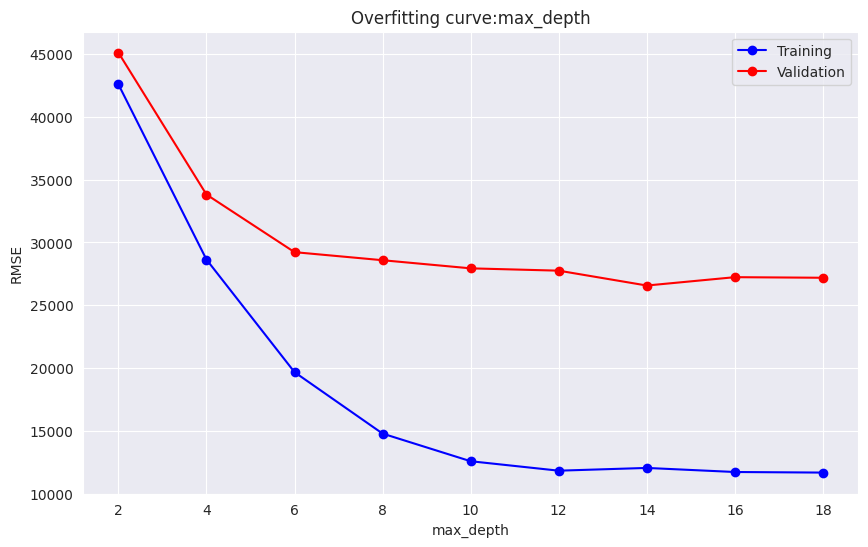

In [217]:
test_param_and_plot('max_depth', range(2, 20, 2))

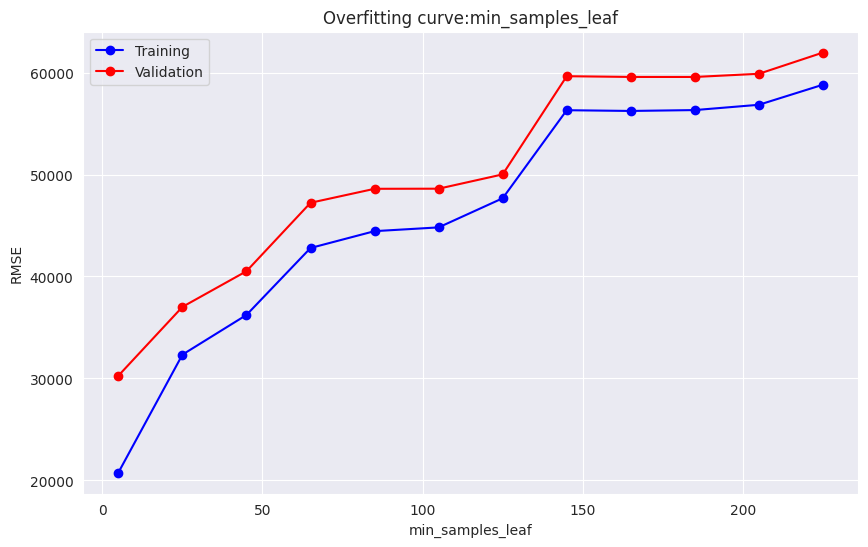

In [229]:
test_param_and_plot('min_samples_leaf', range(5, 226, 20))

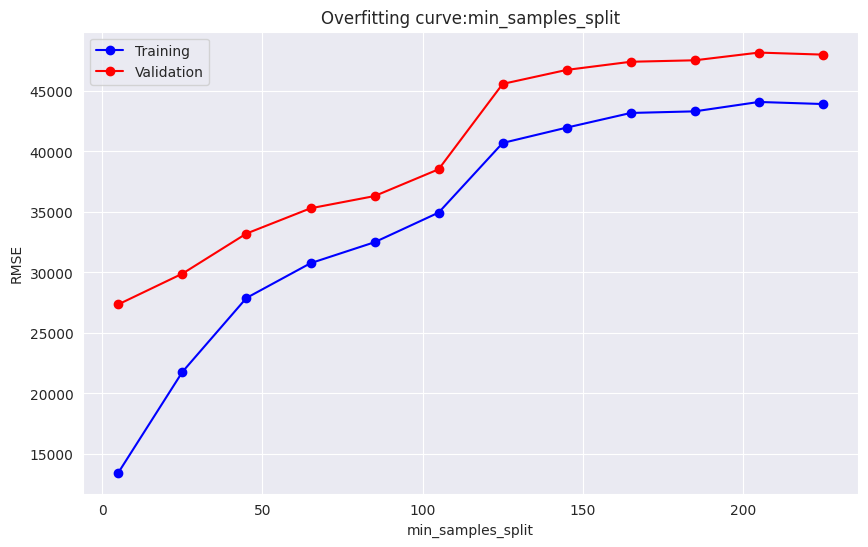

In [230]:
test_param_and_plot('min_samples_split',range(5, 226, 20) )

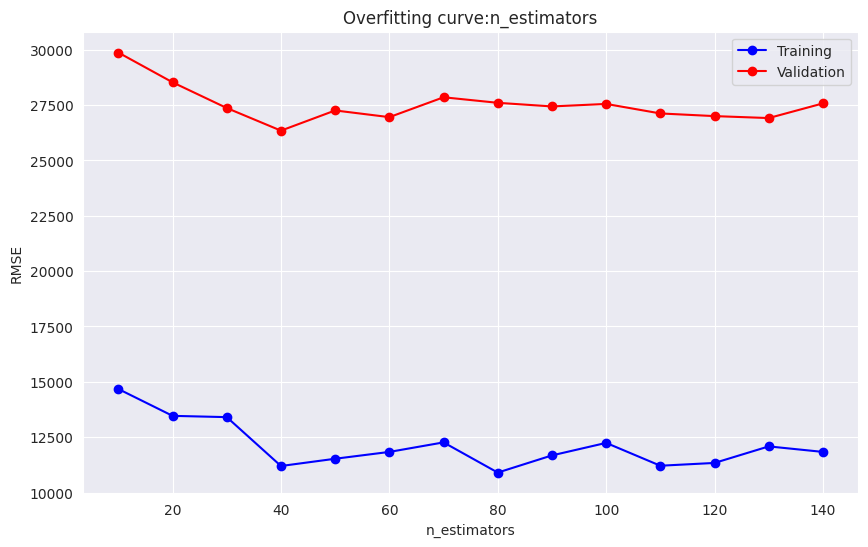

In [231]:
test_param_and_plot('n_estimators', range(10, 150, 10))

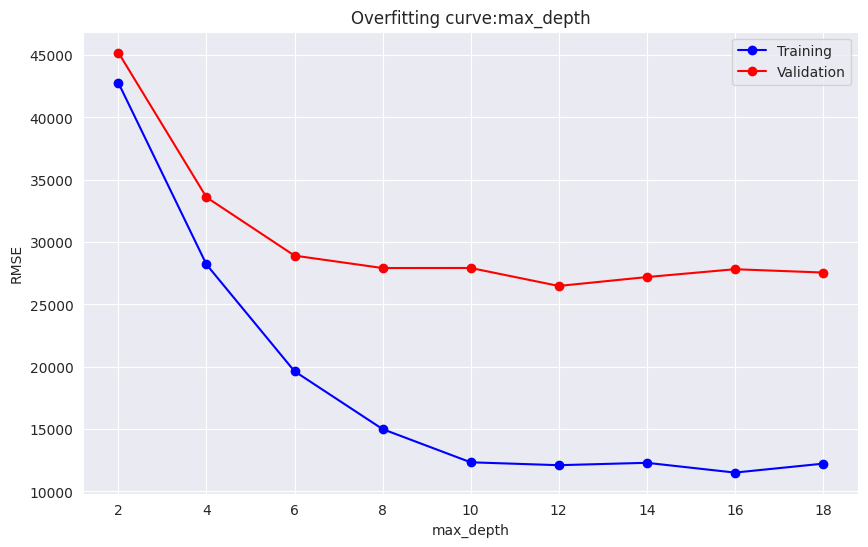

In [222]:
test_param_and_plot('max_depth', range(2, 20, 2))

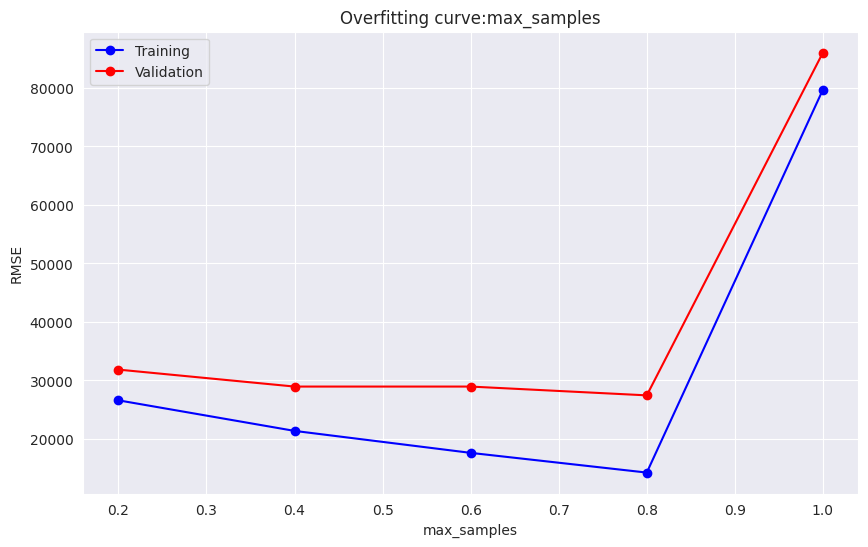

In [232]:
test_param_and_plot('max_samples', [0.2, 0.4, 0.6, 0.8, 1])

In [233]:
model03 = RandomForestRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=100, random_state=42, max_samples=0.8, n_estimators=100)
model03.fit(x_train, train_targets)

RandomForestRegressor(max_depth=4, max_samples=0.8, min_samples_leaf=8,
                      min_samples_split=100, random_state=42)

In [234]:
model030_train_preds = model03.predict(x_train)
model030_train_rmse = mean_squared_error(train_targets, model030_train_preds, squared=False)
model030_val_preds = model03.predict(x_val)
model030_val_rmse = mean_squared_error(val_targets, model030_val_preds, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(model030_train_rmse, model030_val_rmse))

Train RMSE: 39559.2000552358, Validation RMSE: 44266.30196156006


In [235]:
accuracy_train_model030 = model03.score(x_train, train_targets)
accuracy_val_model030 = model03.score(x_val, val_targets)
print(' The accuracy for training set by tree is {:.4f}% and \n for validation set is {:.4f}%'.format(accuracy_train_model030, accuracy_val_model030))

 The accuracy for training set by tree is 0.7422% and 
 for validation set is 0.7203%


## Model 04: XGBRegressor

In [263]:
import xgboost as xgb
from xgboost import XGBRegressor

In [264]:
model04 = xgb.XGBRegressor()
model04.fit(x_train, train_targets)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

finding the feature importance

In [239]:
model04_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model04.feature_importances_
}).sort_values('importance', ascending=False)

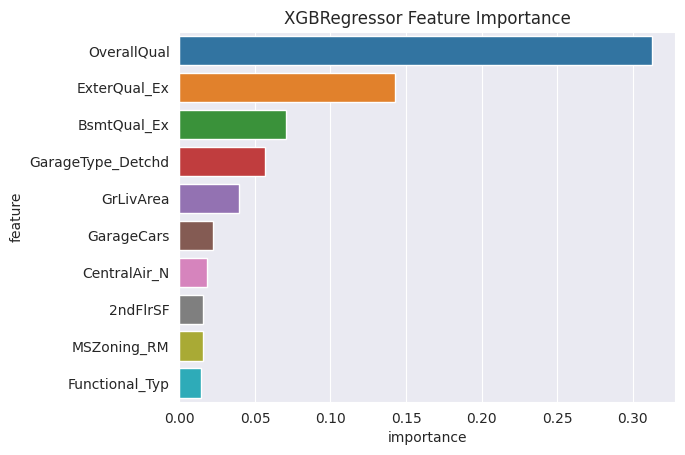

In [240]:
plt.title('XGBRegressor Feature Importance')
sns.barplot(data=model04_importance_df.head(10), x='importance', y='feature');

## Make predictions and find the RMSE of the model

In [265]:
model04_train_preds = model04.predict(x_train)

In [266]:
model04_train_rmse = mean_squared_error(train_targets, model04_train_preds, squared=False)

In [267]:
model04_val_preds = model04.predict(x_val)

In [268]:
model04_val_rmse = mean_squared_error(val_targets, model04_val_preds, squared=False)

In [269]:
print('Train RMSE: {}, Validation RMSE: {}'.format(model04_train_rmse, model04_val_rmse))

Train RMSE: 1264.1138513355263, Validation RMSE: 26265.38414871333


In [270]:
accuracy_train_model04 = model04.score(x_train, train_targets)
accuracy_val_model04 = model03.score(x_val, val_targets)
print(' The accuracy for training set by tree is {:.4f}% and \n for validation set is {:.4f}%'.format(accuracy_train_model04, accuracy_val_model04))

 The accuracy for training set by tree is 0.9997% and 
 for validation set is 0.7203%


Let's try training the model with hiperparameters

In [271]:
def test_params(**params):
    model = xgb.XGBRegressor(**params).fit(x_train, train_targets)
    train_rmse = mean_squared_error(model.predict(x_train), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(x_val), val_targets, squared=False)
    return train_rmse, val_rmse

In [272]:
def test_param_and_plot(param_name, param_values):
    train_rmse_ls, val_rmse_ls = [], []
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_rmse_ls.append(train_rmse)
        val_rmse_ls.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_rmse_ls, 'b-o')
    plt.plot(param_values, val_rmse_ls, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

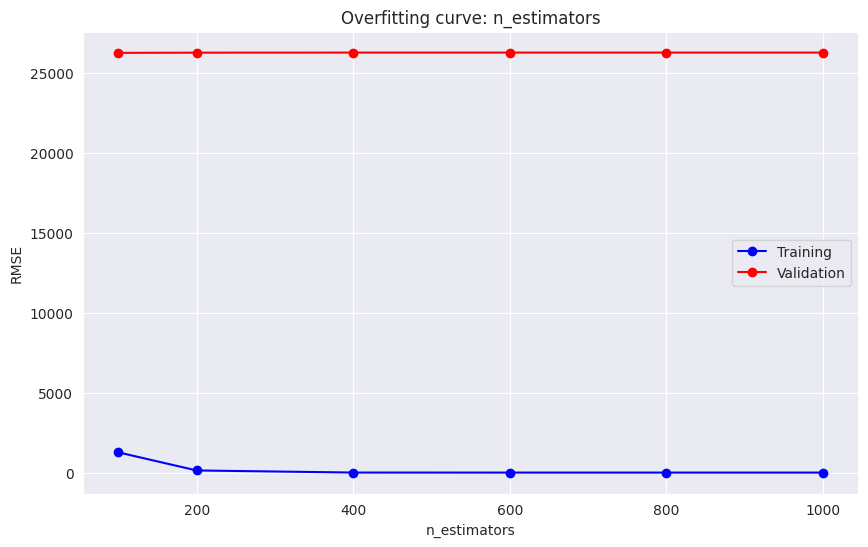

In [273]:
test_param_and_plot('n_estimators', [100, 200, 400, 600, 800, 1000])

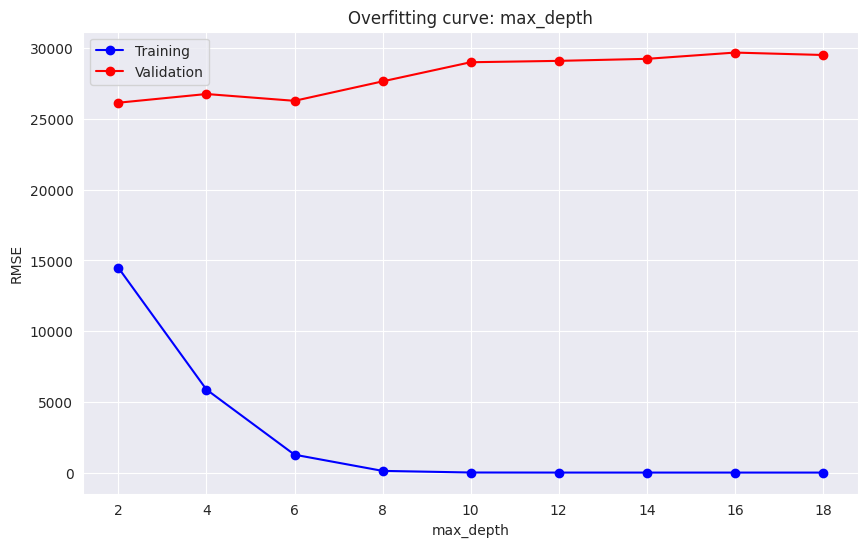

In [274]:
test_param_and_plot('max_depth', range(2, 20, 2))

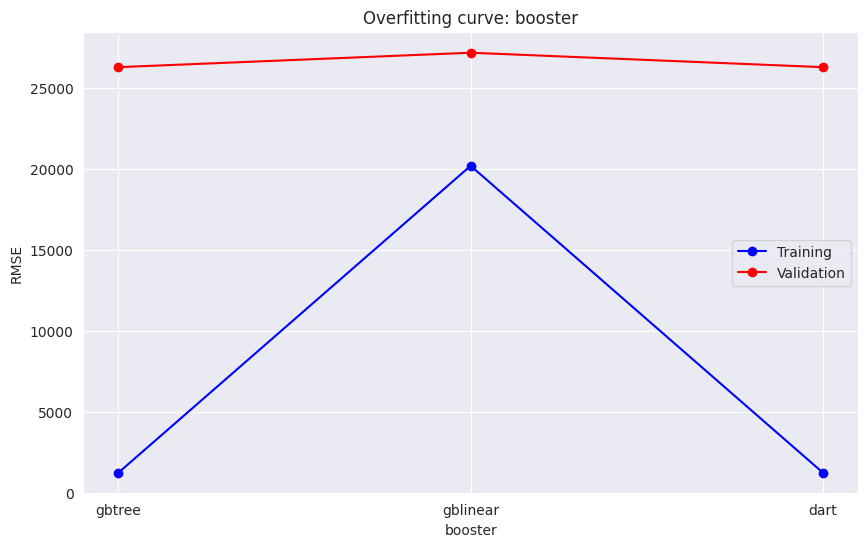

In [275]:
test_param_and_plot('booster', ['gbtree', 'gblinear', 'dart'])

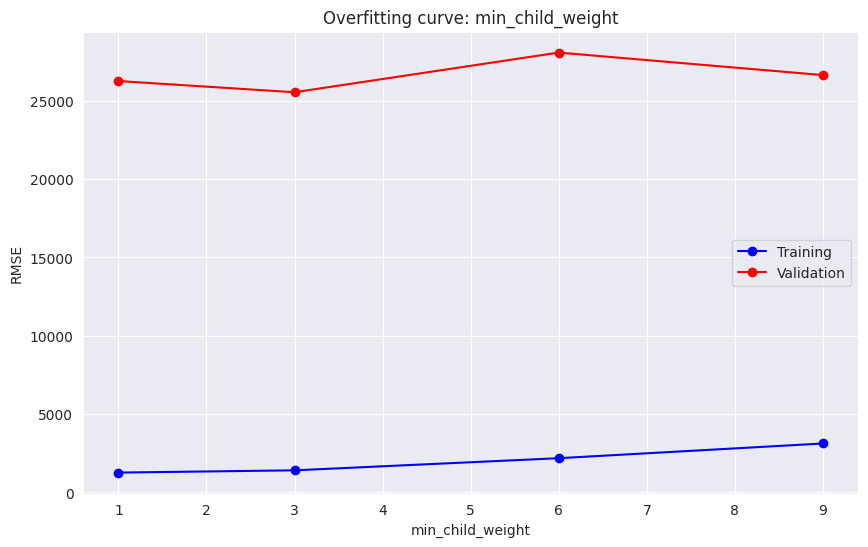

In [276]:
test_param_and_plot('min_child_weight', [1, 3, 6, 9])

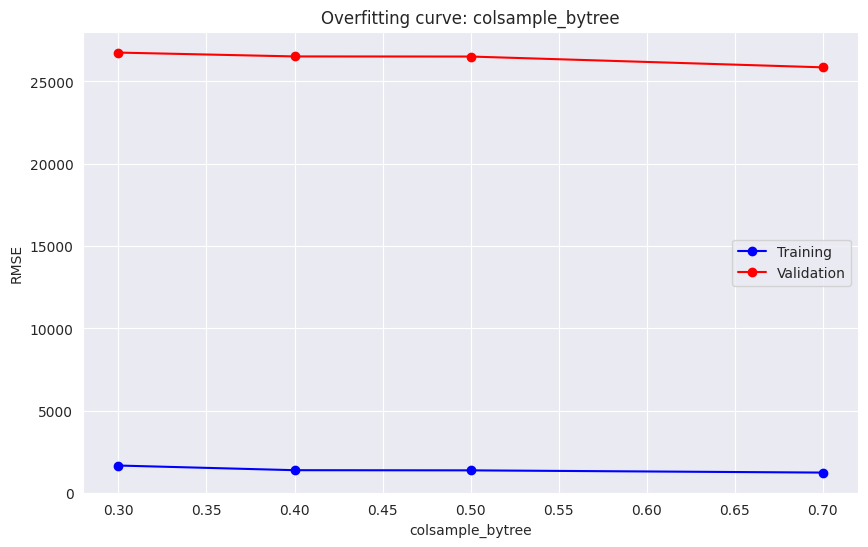

In [277]:
test_param_and_plot('colsample_bytree', [0.3, 0.4, 0.5 , 0.7])

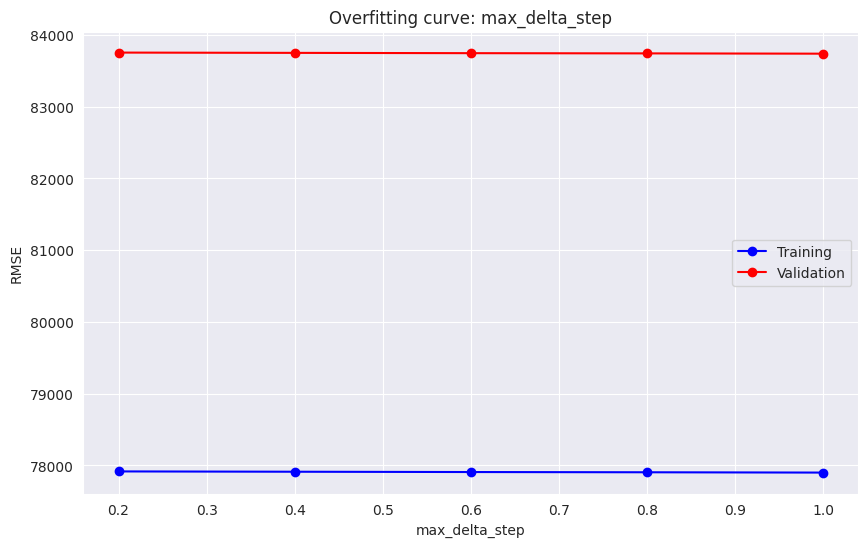

In [278]:
test_param_and_plot('max_delta_step', [0.2, 0.4, 0.6, 0.8, 1])

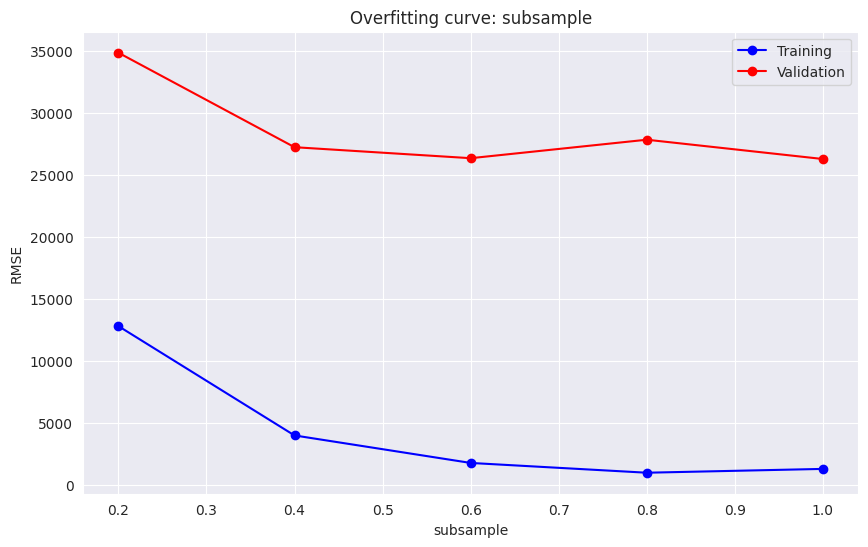

In [279]:
test_param_and_plot('subsample', [0.2, 0.4, 0.6 , 0.8, 1])

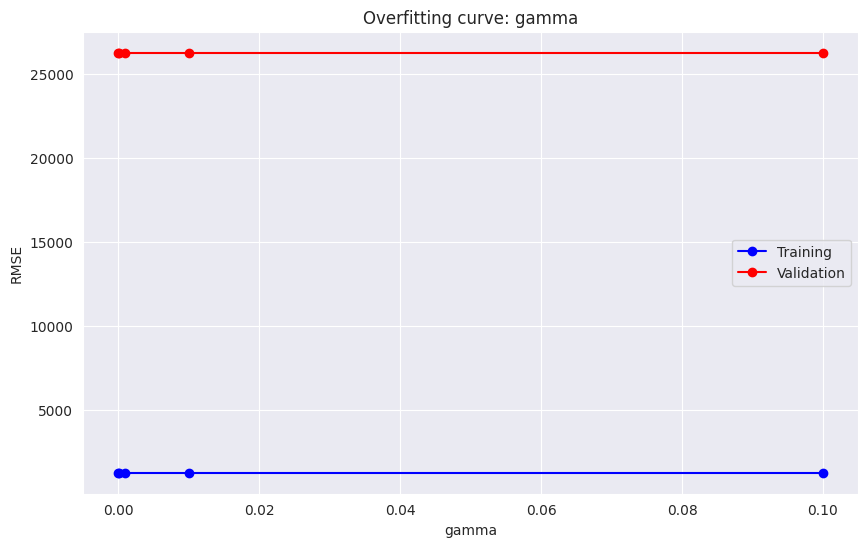

In [280]:
test_param_and_plot('gamma', [0.00001, 0.0001, 0.001, 0.01, 0.1])

In [289]:
model04 = xgb.XGBRegressor(n_estimators = 200, max_depth = 10, learning_rate = 0.1,
                      booster = 'gblinear', gamma = 0.1, min_child_weight = 6,
                      colsample_bytree = 0.5, subsample = 0.4, max_delta_step = 0.4,
                      n_jobs = -1, random_state = 100)
model04.fit(x_train, train_targets)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:30:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0.4,
             max_depth=10, max_leaves=None, min_child_weight=6, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=-1, num_parallel_tree=None, random_state=100, ...)

In [290]:
model040_train_preds = model04.predict(x_train)
model040_train_rmse = mean_squared_error(train_targets, model04_train_preds, squared=False)
model040_val_preds = model04.predict(x_val)
model040_val_rmse = mean_squared_error(val_targets, model04_val_preds, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(model040_train_rmse, model040_val_rmse))

Train RMSE: 1264.1138513355263, Validation RMSE: 26265.38414871333


In [292]:
accuracy_train_model040 = model04.score(x_train,train_targets)
accuracy_val_model040 = model04.score(x_val,val_targets)
print(' The accuracy for training set by tree is {:.4f}% and \n for validation set is {:.4f}%'.format(accuracy_train_model040,accuracy_val_model040))

 The accuracy for training set by tree is 0.9304% and 
 for validation set is 0.8922%


## We will create a dataframe with the summary of train model and RMSE of all models

In [293]:
DecisionTreeRegressor= {'train_rmse(before_tuning)' : model01_train_rmse,
       'val_rmse(before_tuning)' : model01_val_rmse,
        'train_rmse(after_tuning)' : model010_train_rmse,
       'val_rmse(after_tuning)' : model010_val_rmse}

GradientBoostingRegressor = {'train_rmse(before_tuning)' : model02_train_rmse,
       'val_rmse(before_tuning)' : model02_val_rmse,
        'train_rmse(after_tuning)' : model020_train_rmse,
       'val_rmse(after_tuning)' : model020_val_rmse}

RandomForestRegressor = {'train_rmse(before_tuning)' : model03_train_rmse,
       'val_rmse(before_tuning)' : model03_val_rmse,
        'train_rmse(after_tuning)' : model030_train_rmse,
       'val_rmse(after_tuning)' : model030_val_rmse}

XGBRegressor = {'train_rmse(before_tuning)' : model04_train_rmse,
       'val_rmse(before_tuning)' : model04_val_rmse,
        'train_rmse(after_tuning)' : model040_train_rmse,
       'val_rmse(after_tuning)' : model040_val_rmse}


In [294]:
sumary_prediction = pd.DataFrame([DecisionTreeRegressor, GradientBoostingRegressor, RandomForestRegressor,  XGBRegressor ],
                                 index = ['DecisionTreeRegressor', 'GradientBoostingRegressor', 'RandomForestRegressor',  'XGBRegressor' ])
sumary_prediction

,train_rmse(before_tuning),val_rmse(before_tuning),train_rmse(after_tuning),val_rmse(after_tuning)
DecisionTreeRegressor,0.000000,36068.413038,0.000000,36575.975573
GradientBoostingRegressor,13393.100716,25346.693048,13393.100716,26063.685001
RandomForestRegressor,11865.916843,27507.735033,39559.200055,44266.301962
XGBRegressor,1264.113851,26265.384149,1264.113851,26265.384149


## Making Predictions on the Test Set

In [295]:
test_inputs.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.202055,0.048246,0.444444,0.625,0.644928,0.183333,0.0000,0.082920,0.097693,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.205479,0.060609,0.555556,0.625,0.623188,0.133333,0.0675,0.163536,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.181507,0.058566,0.444444,0.500,0.905797,0.800000,0.0000,0.140149,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.235294,0.195205,0.040562,0.555556,0.625,0.913043,0.800000,0.0125,0.106662,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.588235,0.075342,0.017318,0.777778,0.500,0.869565,0.700000,0.0000,0.046598,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.235294,0.184932,0.040665,0.555556,0.500,0.876812,0.733333,0.0000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.000000,0.167979,0.031223,0.555556,0.750,0.869565,0.950000,0.0000,0.165663,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.235294,0.143836,0.033195,0.555556,0.500,0.913043,0.800000,0.0000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.000000,0.219178,0.041487,0.666667,0.500,0.855072,0.666667,0.0000,0.112863,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.000000,0.167808,0.033186,0.333333,0.500,0.710145,0.333333,0.0000,0.142452,0.052917,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [296]:
test_preds = model04.predict(test_inputs)

In [297]:
def predict_and_submit(model, test_inputs, target):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['SalePrice'] = test_preds
    sub_df.to_csv(target, index=None)
    return sub_df

In [298]:
predict_and_submit(model04, test_inputs, 'XGBRegressor_ model_submission.csv')

,Id,SalePrice
0,1461,113985.796875
1,1462,126644.687500
2,1463,189268.921875
3,1464,192756.000000
4,1465,206802.828125
...,...,...
1454,2915,70700.617188
1455,2916,85792.015625
1456,2917,177977.531250
1457,2918,115107.304688
